## Car Brand Classification usingTransfer Learning Resnet 50

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [24]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Train'
valid_path = 'C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Test'


In [25]:
# Import the Resnet 50 library as shown below and add preprocessing layer to the front of Resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [26]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [27]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [28]:
  # useful for getting number of output classes
folders = glob('C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Train\\*')

In [29]:
folders

['C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Train\\audi',
 'C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Train\\lamborghini',
 'C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Train\\mercedes']

In [30]:
len(folders)

3

In [31]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [32]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [33]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [34]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [35]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [37]:
test_set = test_datagen.flow_from_directory('C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [38]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
2/2 [==============================] - 38s 19s/step - loss: 11.2331 - acc: 0.3438 - val_loss: 9.1799 - val_acc: 0.1552
Epoch 2/10
2/2 [==============================] - 33s 17s/step - loss: 10.6059 - acc: 0.5312 - val_loss: 8.3611 - val_acc: 0.3276
Epoch 3/10
2/2 [==============================] - 33s 16s/step - loss: 3.4241 - acc: 0.7031 - val_loss: 13.4393 - val_acc: 0.3276
Epoch 4/10
2/2 [==============================] - 33s 16s/step - loss: 2.5616 - acc: 0.7656 - val_loss: 17.9079 - val_acc: 0.3276
Epoch 5/10
2/2 [==============================] - 33s 17s/step - loss: 0.1546 - acc: 0.9844 - val_loss: 20.4720 - val_acc: 0.3276
Epoch 6/10
2/2 [==============================] - 33s 17s/step - loss: 0.3745 - acc: 0.9688 - val_loss: 22.0564 - val_acc: 0.3276
Epoch 7/10
2/2 [==============================] - 33s 17s/step - loss: 0.4062 - acc: 0.9531 - val_loss: 22.5553 - val_acc: 0.3276
Epoch 8/10
2/2 [==============================] - 33s 17s/step - loss: 0.0469 - acc: 0.984

In [39]:
# to display the metrics of all epochs
rdf = pd.DataFrame(r.history)
print(rdf)

<IPython.core.display.Javascript object>

        loss       acc   val_loss   val_acc
0  11.233057  0.343750   9.179941  0.155172
1  10.605913  0.531250   8.361144  0.327586
2   3.424110  0.703125  13.439325  0.327586
3   2.561617  0.765625  17.907898  0.327586
4   0.154553  0.984375  20.472046  0.327586
5   0.374486  0.968750  22.056432  0.327586
6   0.406153  0.953125  22.555312  0.327586
7   0.046865  0.984375  23.639977  0.327586
8   0.194213  0.968750  23.852064  0.327586
9   0.010543  1.000000  24.351700  0.327586


In [40]:
r.history

{'loss': [11.233056545257568,
  10.605912923812866,
  3.4241100549697876,
  2.561617374420166,
  0.1545533174648881,
  0.3744863271713257,
  0.4061533808708191,
  0.04686514419154264,
  0.19421338514075615,
  0.01054279925301671],
 'acc': [0.34375,
  0.53125,
  0.703125,
  0.765625,
  0.984375,
  0.96875,
  0.953125,
  0.984375,
  0.96875,
  1.0],
 'val_loss': [9.179940700531006,
  8.361144065856934,
  13.439325332641602,
  17.90789794921875,
  20.4720458984375,
  22.056431770324707,
  22.555312156677246,
  23.639976501464844,
  23.85206413269043,
  24.351699829101562],
 'val_acc': [0.15517241,
  0.3275862,
  0.3275862,
  0.3275862,
  0.3275862,
  0.3275862,
  0.3275862,
  0.3275862,
  0.3275862,
  0.3275862]}

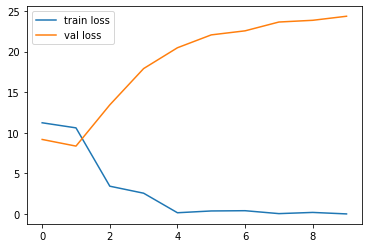

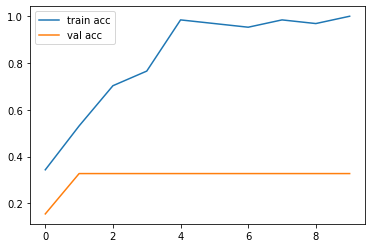

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
!pip install -q pyyaml h5py

In [ ]:
#!mkdir -p saved_model

In [49]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\model_resnet50.h5')

In [50]:

y_pred = model.predict(test_set)


In [51]:
y_pred

array([[2.5322016e-14, 5.7835807e-17, 1.0000000e+00],
       [2.6723146e-14, 5.6160832e-17, 1.0000000e+00],
       [7.2608316e-15, 3.6422079e-17, 1.0000000e+00],
       [1.8420419e-14, 3.1948510e-16, 1.0000000e+00],
       [2.9228966e-14, 3.6659884e-17, 1.0000000e+00],
       [3.6141798e-14, 3.6967006e-17, 1.0000000e+00],
       [2.7149049e-14, 9.6477661e-17, 1.0000000e+00],
       [2.7646893e-14, 1.0881425e-16, 1.0000000e+00],
       [3.2578049e-14, 3.4260828e-17, 1.0000000e+00],
       [7.9505020e-14, 8.7867373e-17, 1.0000000e+00],
       [1.2040150e-14, 3.6637795e-17, 1.0000000e+00],
       [6.1807777e-14, 2.6054932e-16, 1.0000000e+00],
       [1.7308210e-14, 3.9824908e-17, 1.0000000e+00],
       [9.9761533e-15, 5.3976364e-18, 1.0000000e+00],
       [2.5417341e-14, 6.7028509e-18, 1.0000000e+00],
       [1.1768630e-13, 1.6943536e-16, 1.0000000e+00],
       [8.7134796e-15, 2.3149692e-17, 1.0000000e+00],
       [2.4228151e-14, 1.1539291e-16, 1.0000000e+00],
       [9.2060072e-15, 1.858

In [52]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [53]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [55]:
model=load_model('C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\model_resnet50.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [56]:
img=image.load_img('C:\\Users\\Hemalatha\\Desktop\\Car brand classification\\Datasets\\Datasets\\Test\\lamborghini\\11.jpg',target_size=(224,224))



In [57]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [58]:
x.shape

(224, 224, 3)

In [59]:
x=x/255

In [60]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [61]:
model.predict(img_data)

array([[8.7177973e-08, 1.2353676e-07, 9.9999976e-01]], dtype=float32)

In [62]:
a=np.argmax(model.predict(img_data), axis=1)

In [63]:
a==1

array([False])